# TSF Time series fore casting

## 4 types of data

### Trend -- pdq

### seasonality -- PDQ

### cyclicity -- when we have recession, war, unpredictable but we know this might happen

### random-- noicy data without trend or seasonality



### To check whether a data is TSF or Regression data


#### We will do Darbin-Watson Test if DWT==2 means regression or regression problem


#### If DWT<2 Positity Auto correlation


#### If DWT>2 Negative Auto correlation




#### Autocorrelation or Serial correlation: A mathematical relation b/w current and previous data

In [5]:
# Time series will only apply on stationary data which can be calculated by Augmented deckey fuller test or we can use Rolling techniques

# Hypothesis p<0.05 means Stationary 
# else Non stationary

In [6]:
# Measuring the TSF using
# 1) MAE mean absolute error
# 2) MAPE mean absolute percent error
# 3) AIC=2k-ln(L)
# L-max (m)
# k=pdq(trend-- 3 parameters like p-autoregressive, d- integrated, q-moving avearge)
# k=PDQ(parameters like p-autoregressive, d- integrated, q-moving avearge with seasonality)


In [7]:
#  If you know ARIMA 90% work done in TSF

# # models
# Auto regressive-univariety means only one independet variable or feature for forecast
# moving average-univariety
# Auto regressive moving average-univariety
# Auto regressive integrated moving average-univariety
# Seasonal Auto regressive Integrated moving average-univariety
# VAR vector autoregressive-univariety
# VARIMA vector autoregressive Integrated moving average-univariety


In [8]:
# Facebook phrophet a automation 
# DL- Dart automation, LSTM long short term memory

In [9]:
# 1 -- st autocorrelated or not DWT!=2
# 2 -- stationary ADFT- rolling test p<0.05 stationary

In [10]:
# if data is non stationary we need to use LAG formula
# again check augmented deckay fuller test to check stationarity

In [11]:
import os
os.getcwd()

'C:\\Users\\shett\\Documents\\TSF'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# injupyter notebook only this displays 
# %matplotlib qt-- outside jupyter notebook this will display



import datetime


import warnings 
warnings.filterwarnings('ignore')
# no warnings


In [13]:
# Datetime should be in series that to in sequence of order

In [14]:
dataset=pd.read_csv('AirPassengers.csv')

In [15]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [17]:
dataset.shape

(144, 2)

In [18]:
# in TSF we need atleast 2 columns 1 DateTime and other what you want to predict

In [ ]:
# here we need to forecast for next 3 months of data which is in yellow shadedi

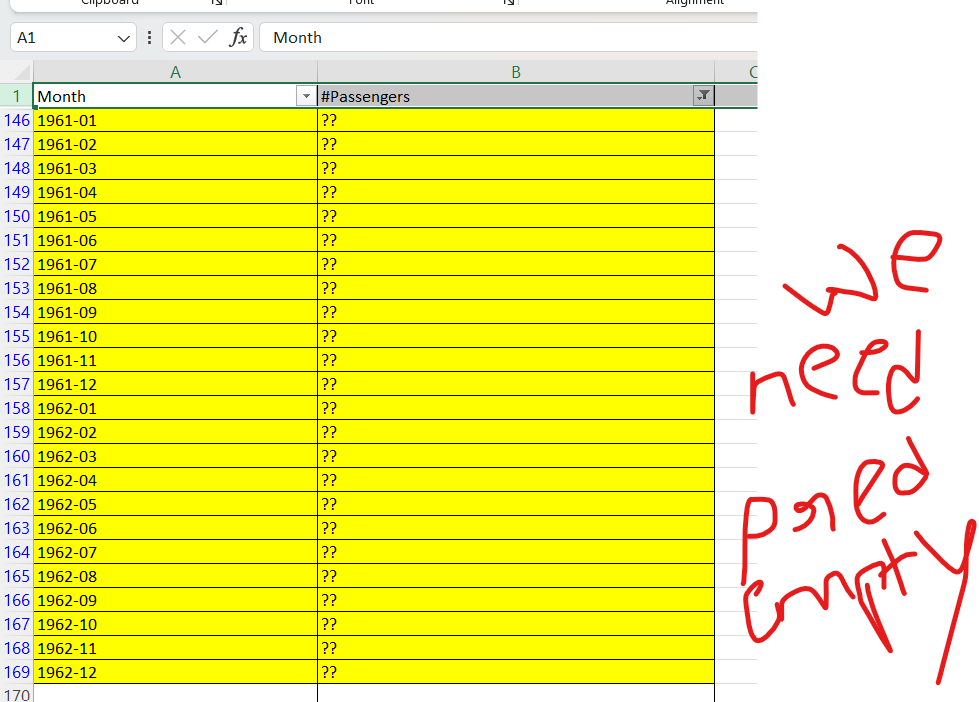

In [20]:
# Go to make my trip and solve the problem

In [21]:
# In TSF there should not be any missing data

In [22]:
dataset.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [23]:
#  we dont have any missing data
#  we need to check there should be sequential data
# we need to predict future data

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
# Datetime format-YYYY-MM
# we need to make YYYY-MM-DD

In [27]:
dataset.columns.tolist()

['Month', 'Passengers']

In [28]:
dataset['Month']=pd.to_datetime(dataset['Month'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [29]:
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [30]:
# YYYY-MM-DD
# so by default it taken as 1st day of month

In [31]:
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [32]:
# we need to remove index and make datetime as index

In [33]:
from numpy import log
from pandas import Series


In [34]:
dataset.set_index('Month',inplace=True)
dataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


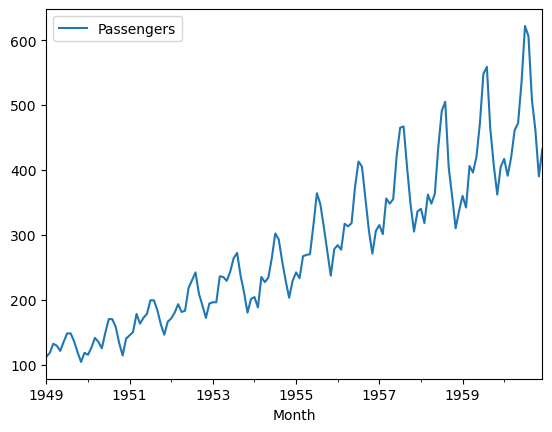

In [35]:
dataset.plot()
plt.show()

# Decomposition: Method used to find components of data like, Trend, Seasonality, Cyclicity, Irregularity

In [37]:
#  Trend: - There is a trend as we have long term data of 12 years and this is upward trend


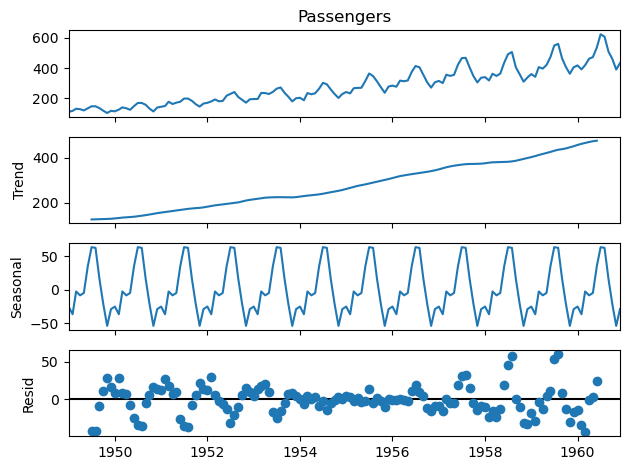

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition=seasonal_decompose(dataset['Passengers'],period=12)
decomposition.plot()
plt.show()

# Resid means residual or error

In [40]:
dataset['Passengers'].isnull().sum()

0

In [41]:
dataset.shape

(144, 1)

In [42]:
dataset.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [43]:
# Check auto correlation: by Derbin-watson test

In [44]:
import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Passengers'])

0.0121527966037621

In [45]:
# mearly zero means highly +vely correlated

In [46]:
# DWT<2 highly +ve
# DWT==2 means regression problem
# DWT>2 highly -ve

# Check TS is stationary or not

### Approach--Augmented deckay fuller test

In [91]:
from statsmodels.tsa.stattools import adfuller

In [93]:
adfuller(dataset['Passengers'])

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [95]:
def adf_test(timeseries):
    result=adfuller(timeseries)
    print("*****************Augmented deckay fuller test analysis***************")
    labels=['ADF Test','p-value','#Lags','No of jobs']
    for a, b in zip(labels,result):
        print(a+' : '+str(b))
    if result[1]<=0.05:
        print("Strong evidence againast null hypothesis and my time series is Stationary")
    else:
        print("Weak evidence againast null hypothesis and my time series is Non-Stationary")
        
    


In [97]:
adf_test(dataset['Passengers'])

*****************Augmented deckay fuller test analysis***************
ADF Test : 0.8153688792060511
p-value : 0.991880243437641
#Lags : 13
No of jobs : 130
Weak evidence againast null hypothesis and my time series is Non-Stationary


In [101]:
# Apply Lag approach to make our time series data to stationary

dataset['1st Diff']=dataset['Passengers']-dataset['Passengers'].shift(1)

In [103]:
dataset['Passengers'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Passengers, Length: 144, dtype: float64

In [105]:
dataset['1st Diff']

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: 1st Diff, Length: 144, dtype: float64

In [109]:
dataset['1st Diff'].head(10)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
1949-07-01    13.0
1949-08-01     0.0
1949-09-01   -12.0
1949-10-01   -17.0
Name: 1st Diff, dtype: float64

In [111]:
dataset.head()

,Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [135]:
adf_test(dataset['1st Diff'].dropna())

*****************Augmented deckay fuller test analysis***************
ADF Test : -2.8292668241699874
p-value : 0.05421329028382711
#Lags : 12
No of jobs : 130
Weak evidence againast null hypothesis and my time series is Non-Stationary


In [119]:
# Weak evidence againast null hypothesis and my time series is Non-Stationary

In [123]:
dataset.tail()

,Passengers,1st Diff
Month,,
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0
1960-11-01,390,-71.0
1960-12-01,432,42.0


In [125]:
dataset['2st Diff']=dataset['1st Diff']-dataset['1st Diff'].shift(1)

In [127]:
dataset['1st Diff'].shift(1)

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     6.0
1949-04-01    14.0
1949-05-01    -3.0
              ... 
1960-08-01    87.0
1960-09-01   -16.0
1960-10-01   -98.0
1960-11-01   -47.0
1960-12-01   -71.0
Name: 1st Diff, Length: 144, dtype: float64

In [133]:
adf_test(dataset['2st Diff'].dropna())

*****************Augmented deckay fuller test analysis***************
ADF Test : -16.384231542468523
p-value : 2.7328918500141235e-29
#Lags : 11
No of jobs : 130
Strong evidence againast null hypothesis and my time series is Stationary


In [139]:
# Strong evidence againast null hypothesis and my time series is Stationary

In [141]:
# AIC--Aikike information criteria

# parameter(k)=trend(pdq) and seasonality(PDQ)
# difference= integrated method: d=2
# Seasonality: D=? difference b/w jan 2023-jan 2022 like wise 12 month here seasonality
dataset['Seasonality']=dataset['Passengers']-dataset['Passengers'].shift(12)

In [145]:
dataset

,Passengers,1st Diff,2st Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [149]:
adf_test(dataset['Seasonality'].dropna())

*****************Augmented deckay fuller test analysis***************
ADF Test : -3.3830207264924796
p-value : 0.011551493085515008
#Lags : 1
No of jobs : 130
Strong evidence againast null hypothesis and my time series is Stationary


In [151]:
# d=2 two times difference we did
# D=1 here we did only 1s difference

# ARIMA--AutoRegressive Integrated(d and D) Moving Average
# Integrated value d=2 and D=1

# Auto Regressive: q=? and Q=?(Autocorrelation)

# Moving Average: p=? and P=?(Partial autocorrelation)


In [153]:
# 19 completed